# Predict order total price by time of the day
You are given data of orders from restaurant/night club, which contains the time (in hours from 0 to 23) when the order was created, and the total price of
all bought dishes.

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,6)

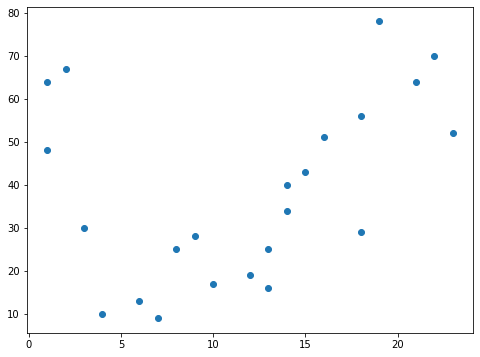

In [ ]:
time = [1, 1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 13, 14, 14, 15, 16, 18, 18, 19, 21, 22, 23]  # in hours
prices = [64, 48, 67, 30, 10, 13, 9, 25, 28, 17, 19, 16, 25, 40, 34, 43, 51, 29, 56, 78, 64, 70, 52]  # in $USD

plt.scatter(time, prices)
plt.show()

# Task

Your task is to create a model using Regression, which will predict future order prices by the hour of the day. The closer this model will be to the truth - the better.

### Linear Regression

Let's start with Linear Regression, and check, if it fits our needs.
Here you need to do these steps:
1. Apply linregress to `time` and `prices`. 
2. Create `estimate_order_price` function to predict value by slope & intercept
3. Map `estimate_order_price` function to `time` to `estimated_order_prices` list.
4. Plot the scatter and the linear regression line (already written instead of you)

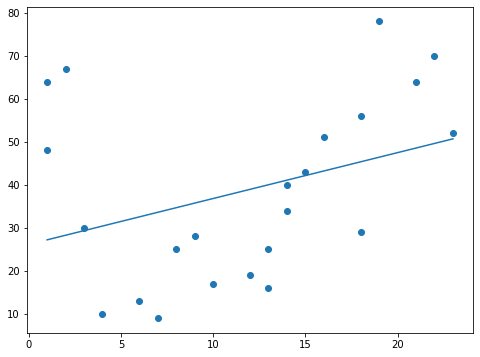

In [ ]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(time, prices)

def estimate_order_price(x):
  return slope * x + intercept

estimated_order_prices = list(map(estimate_order_price, time))

plt.scatter(time, prices)
plt.plot(time, estimated_order_prices)
plt.show()

### R2-score & MSE

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R2-score (Determitaion):", r2_score(prices, estimated_order_prices))
print("MSE:", mean_squared_error(prices, estimated_order_prices))

R2-score (Determitaion): 0.12072448399264402
MSE: 373.1751667313337


# Train/Test split

In [ ]:
test_time = time[:5]
test_prices = prices[:5]

train_time = time[5:]
train_prices = prices[5:]

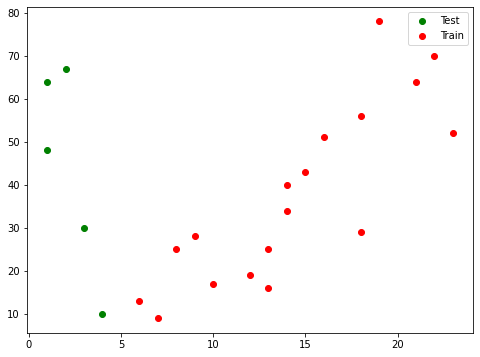

In [ ]:
plt.scatter(test_time, test_prices, c="green")
plt.scatter(train_time, train_prices, c="red")
plt.legend(('Test', 'Train'))
plt.show()

### Fit train set

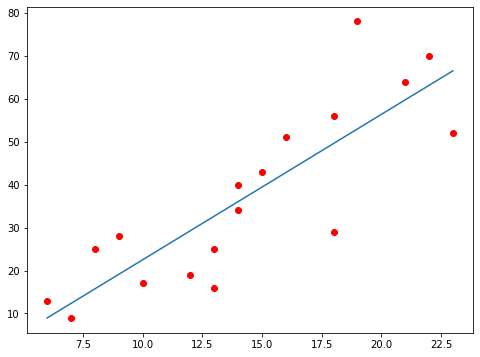

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(train_time, train_prices)

def estimate_order_price(x):
  return slope * x + intercept

estimated_order_prices = list(map(estimate_order_price, train_time))

plt.scatter(train_time, train_prices, c="red")
plt.plot(train_time, estimated_order_prices)
plt.show()

In [ ]:
print("R2-score (Determitaion):", r2_score(train_prices, estimated_order_prices))
print("MSE:", mean_squared_error(train_prices, estimated_order_prices))

R2-score (Determitaion): 0.7077517997943092
MSE: 118.4011111111111


### Evaluate on test set

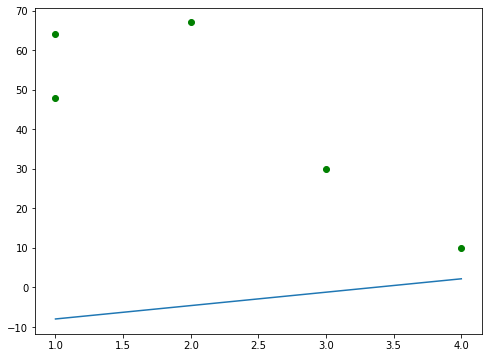

In [ ]:
estimated_order_prices = list(map(estimate_order_price, test_time))

plt.scatter(test_time, test_prices, c="green")
plt.plot(test_time, estimated_order_prices)
plt.show()

In [ ]:
print("R2-score (Determitaion):", r2_score(test_prices, estimated_order_prices))
print("MSE:", mean_squared_error(test_prices, estimated_order_prices))

R2-score (Determitaion): -5.304308794629995
MSE: 2895.9472879012346


# Train/Test split randomly

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(time, prices, test_size=0.2, random_state=25)  # random_state set just to have the same split for everyone

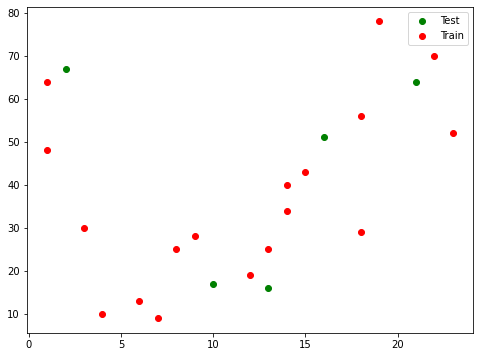

In [ ]:
plt.scatter(x_test, y_test, c="green")
plt.scatter(x_train, y_train, c="red")
plt.legend(('Test', 'Train'))
plt.show()

### Fit Train one more time, but with different train/test split

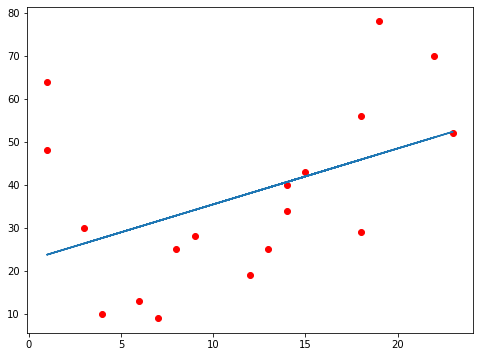

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x_train, y_train)

def estimate_order_price(x):
  return slope * x + intercept

estimated_order_prices = list(map(estimate_order_price, x_train))

plt.scatter(x_train, y_train, c="red")
plt.plot(x_train, estimated_order_prices)
plt.show()

In [ ]:
print("R2-score (Determitaion):", r2_score(y_train, estimated_order_prices))
print("MSE:", mean_squared_error(y_train, estimated_order_prices))

R2-score (Determitaion): 0.1959285262621634
MSE: 319.4968074088976


### Evaluate one more time on test, but with different train/test split

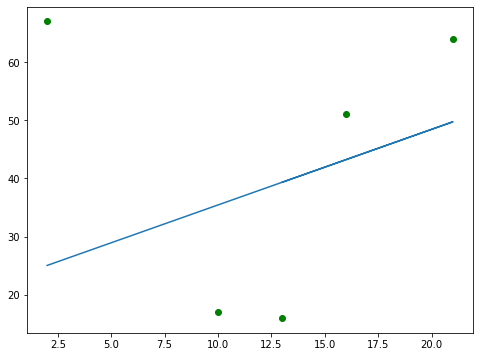

In [ ]:
estimated_order_prices = list(map(estimate_order_price, x_test))

plt.scatter(x_test, y_test, c="green")
plt.plot(x_test, estimated_order_prices)
plt.show()

In [ ]:
print("R2-score (Determitaion):", r2_score(y_test, estimated_order_prices))
print("MSE:", mean_squared_error(y_test, estimated_order_prices))

R2-score (Determitaion): -0.17027405684146535
MSE: 581.8602610615766


# Polynomial Regression

https://www.w3schools.com/python/python_ml_polynomial_regression.asp

### Fit train

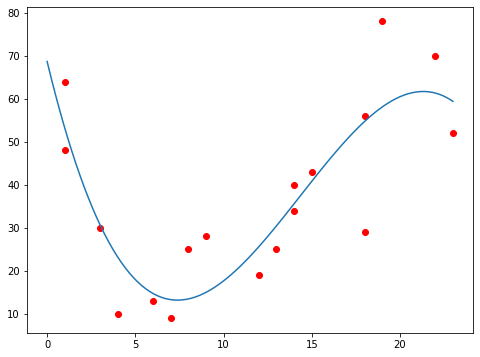

In [ ]:
import numpy

model = numpy.poly1d(numpy.polyfit(x_train, y_train, 3))
line = numpy.linspace(0, 23, 100)

plt.scatter(x_train, y_train, c="red")
plt.plot(line, model(line))
plt.show()

### Predict future value

In [ ]:
model(10)

17.629279140854237

### R2-score & MSE

In [ ]:
print("R2-score (Determitaion):", r2_score(y_train, model(x_train)))
print("MSE:", mean_squared_error(y_train, model(x_train)))

R2-score (Determitaion): 0.7297170344054461
MSE: 107.3966026963224


### Evaluate on test

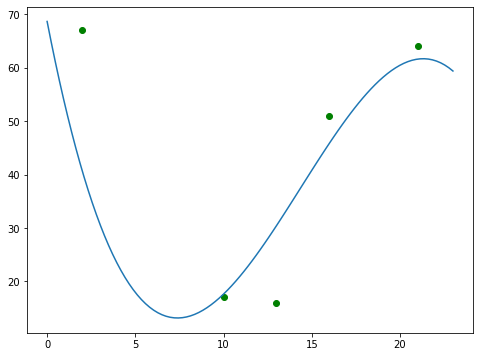

In [ ]:
plt.scatter(x_test, y_test, c="green")
plt.plot(line, model(line))
plt.show()

In [ ]:
print("R2-score (Determitaion):", r2_score(y_test, model(x_test)))
print("MSE:", mean_squared_error(y_test, model(x_test)))

R2-score (Determitaion): 0.622882250935055
MSE: 187.50294483509066


# Results

Finally, we have quite good model to predict future values built with Polynomial Regression.